**Planteamiento del problema:**
La actividad aborda la necesidad de perfeccionar el diseño de mecanismos de cuatro barras para simular trayectorias rectas. Aunque estos mecanismos naturalmente no logran una rectitud perfecta, el objetivo es crear un algoritmo de interpolación que aproxime esta trayectoria lo más posible, manteniendo una velocidad constante. Este desafío combina teoría mecánica con aplicaciones prácticas, buscando un equilibrio entre las limitaciones estructurales y los requisitos de diseño para aplicaciones industriales, mejorando así la eficiencia y precisión de los mecanismos en cuestión.

# Interpolación

## Librerias

In [1]:
#Importar Librerias
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

## Vectores

In [2]:
x = [20, 40, 60, 80, 100, 120, 140, 160, 180]
y_SL2 = [0.601, 1.193, 1.763, 2.299, 2.790, 3.238, 3.623, 3.933, 4.181]
y_SL3 = [3.963, 3.925, 3.850, 3.738, 3.588, 3.438, 3.250, 3.025, 2.800]
y_SL1 = [2.975, 2.950, 2.900, 2.825, 2.725, 2.625, 2.500, 2.350, 2.200]
y_VL2 = [0.480, 0.950, 1.411, 1.845, 2.237, 2.600, 2.932, 3.232, 3.456]
y_VL3 = [2.613, 2.575, 2.538, 2.463, 2.350, 2.238, 2.125, 2.013, 1.863]
y_VL1 = [2.075, 2.050, 2.025, 1.975, 1.900, 1.825, 1.750, 1.675, 1.575]

### Lagrange

In [4]:
# Polinomio de Lagrange
pSL2 = lagrange(x,y_SL2)
pSL3 = lagrange(x,y_SL3)
pSL1 = lagrange(x,y_SL1)
pVL2 = lagrange(x,y_VL2)
pVL3 = lagrange(x,y_VL3)
pVL1 = lagrange(x,y_VL1)

# Evaluar polinomio obtenido en un intervalo de [20,180].
x1 = np.linspace(20,180,100)
y1 = pSL2(x1)
y2 = pSL3(x1)
y3 = pSL1(x1)
y4 = pVL2(x1)
y5 = pVL3(x1)
y6 = pVL1(x1)

#### Gráficas Lagrange

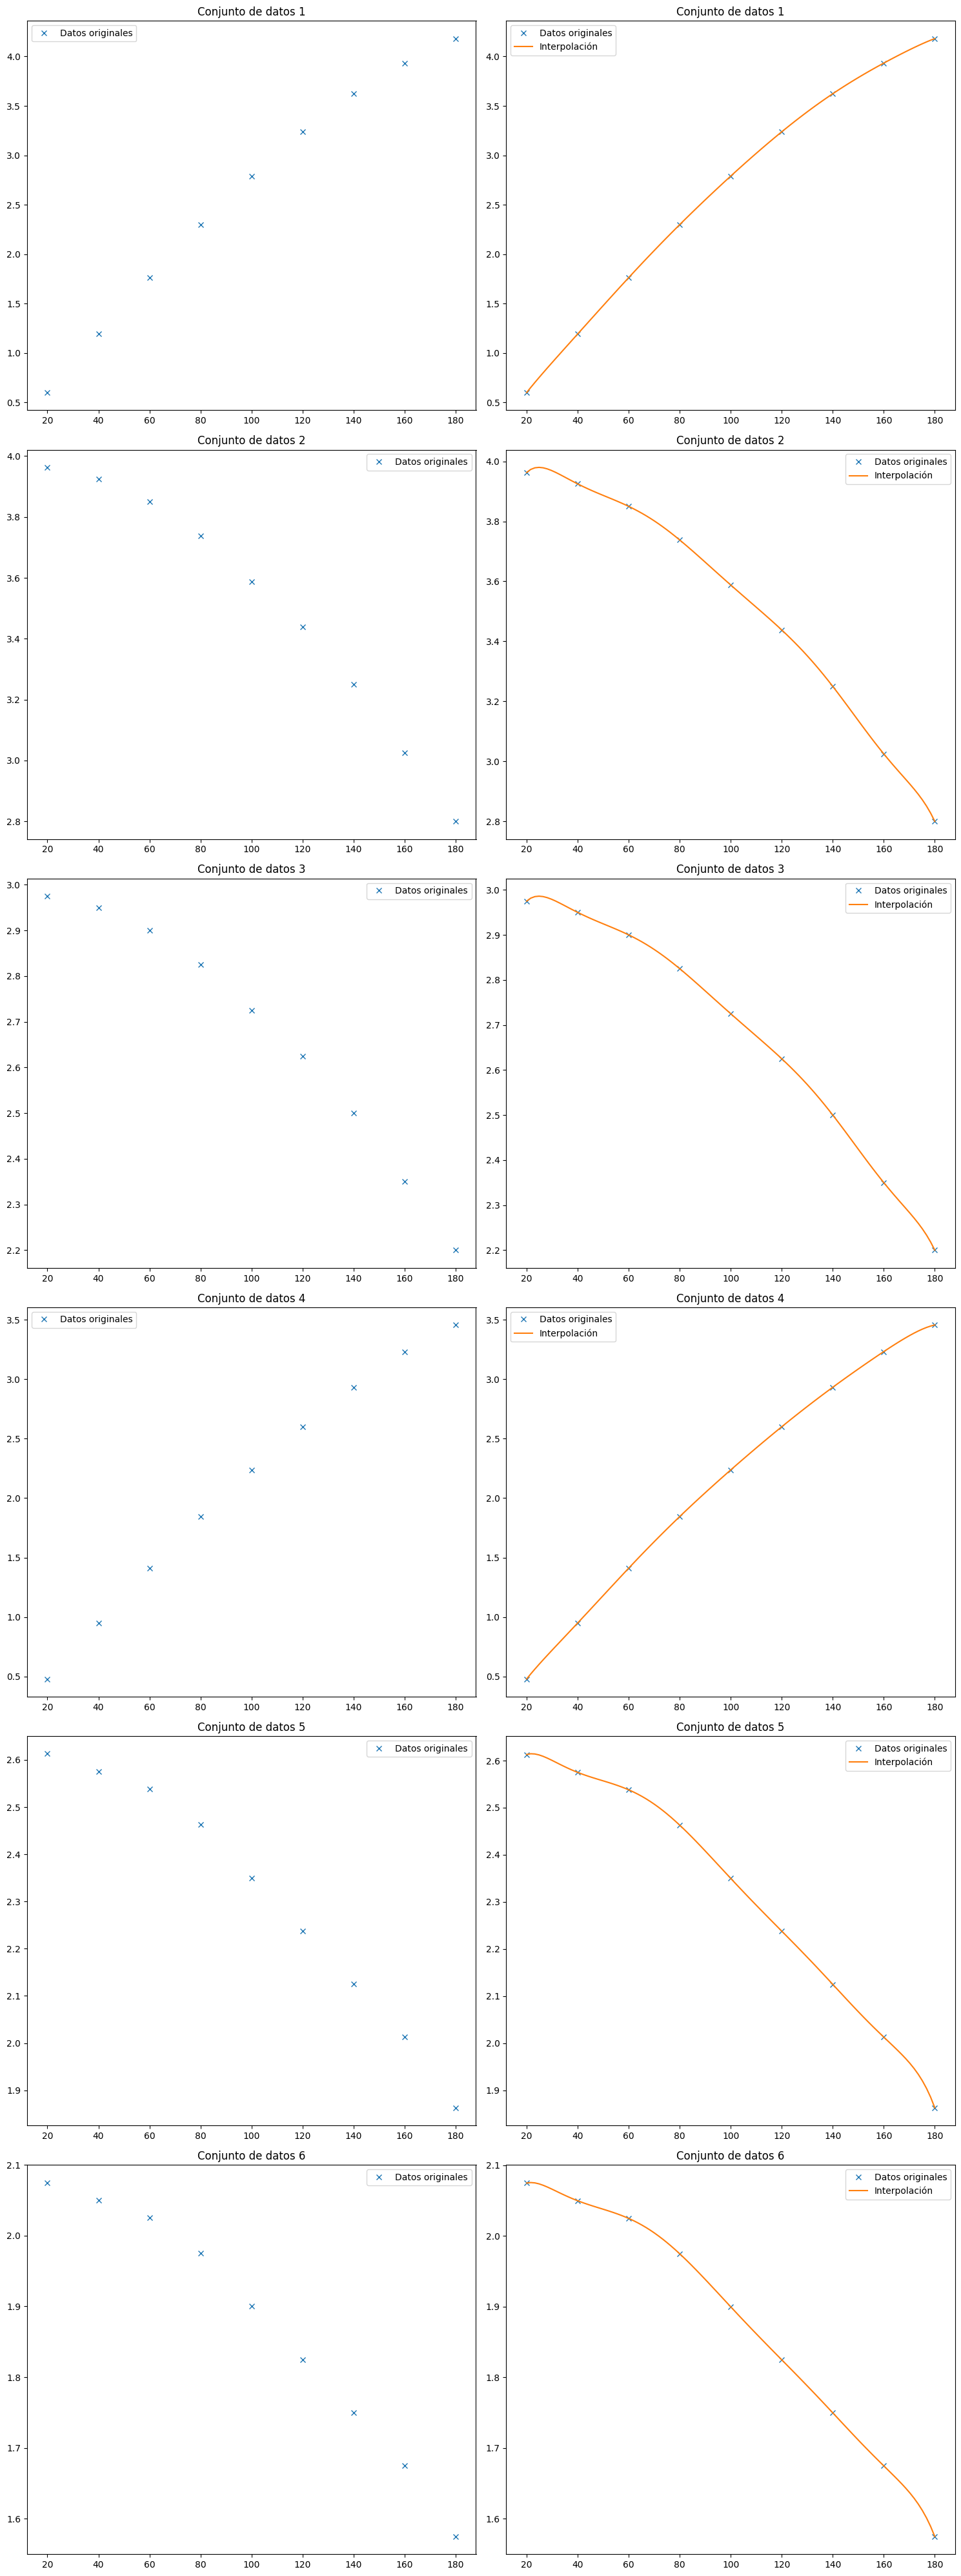

In [5]:
# Figura
fig, axs = plt.subplots(6, 2, figsize=(15, 40))

datos_originales = [y_SL2, y_SL3, y_SL1, y_VL2, y_VL3, y_VL1]
interpolaciones = [y1, y2, y3, y4, y5, y6]

for i in range(6):
    axs[i, 0].plot(x, datos_originales[i], 'x', label='Datos originales')
    axs[i, 0].set_title(f'Conjunto de datos {i+1}')
    axs[i, 0].legend()

for i, interpolacion in enumerate(interpolaciones):
    axs[i, 1].plot(x, datos_originales[i], 'x', label='Datos originales')
    if interpolacion is not None:
        axs[i, 1].plot(x1, interpolacion, '-', label='Interpolación')
    axs[i, 1].set_title(f'Conjunto de datos {i+1}')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

#### Valores en x(30) y x(55)

In [6]:
# Valores de interpolación en x(30) y x(55)
print(f"El valor interpolado para x(30) = {pSL2(55):.3f}, y x(55) = {pSL2(30):.3f}")
print(f"El valor interpolado para x(30) = {pSL3(55):.3f}, y x(55) = {pSL3(30):.3f}")
print(f"El valor interpolado para x(30) = {pSL1(55):.3f}, y x(55) = {pSL1(30):.3f}")
print(f"El valor interpolado para x(30) = {pVL2(55):.3f}, y x(55) = {pVL2(30):.3f}")
print(f"El valor interpolado para x(30) = {pVL3(55):.3f}, y x(55) = {pVL3(30):.3f}")
print(f"El valor interpolado para x(30) = {pVL1(55):.3f}, y x(55) = {pVL1(30):.3f}")

El valor interpolado para x(30) = 1.622, y x(55) = 0.905
El valor interpolado para x(30) = 3.869, y x(55) = 3.969
El valor interpolado para x(30) = 2.913, y x(55) = 2.979
El valor interpolado para x(30) = 1.296, y x(55) = 0.722
El valor interpolado para x(30) = 2.548, y x(55) = 2.600
El valor interpolado para x(30) = 2.032, y x(55) = 2.066


## Numpy

In [7]:
# Valor a interpolar
x_interpolar1 = 30
x_interpolar2 = 55

# Realizar la interpolación
interSL2 = np.interp(x_interpolar1, x, y_SL2)
interSL3 = np.interp(x_interpolar1, x, y_SL3)
interSL1 = np.interp(x_interpolar1, x, y_SL1)
interVL2 = np.interp(x_interpolar1, x, y_VL2)
interVL3 = np.interp(x_interpolar1, x, y_VL3)
interVL1 = np.interp(x_interpolar1, x, y_VL1)
inter_SL2 = np.interp(x_interpolar2, x, y_SL2)
inter_SL3 = np.interp(x_interpolar2, x, y_SL3)
inter_SL1 = np.interp(x_interpolar2, x, y_SL1)
inter_VL2 = np.interp(x_interpolar2, x, y_VL2)
inter_VL3 = np.interp(x_interpolar2, x, y_VL3)
inter_VL1 = np.interp(x_interpolar2, x, y_VL1)

# Evaluar polinomio obtenido en un intervalo de [20,180].
x1 = np.linspace(20,180,100)
ya = np.interp(x1, x, y_SL2)
yb = np.interp(x1, x, y_SL3)
yc = np.interp(x1, x, y_SL1)
yd = np.interp(x1, x, y_VL2)
ye = np.interp(x1, x, y_VL3)
yf = np.interp(x1, x, y_VL1)

#### Gráficas Método Numpy

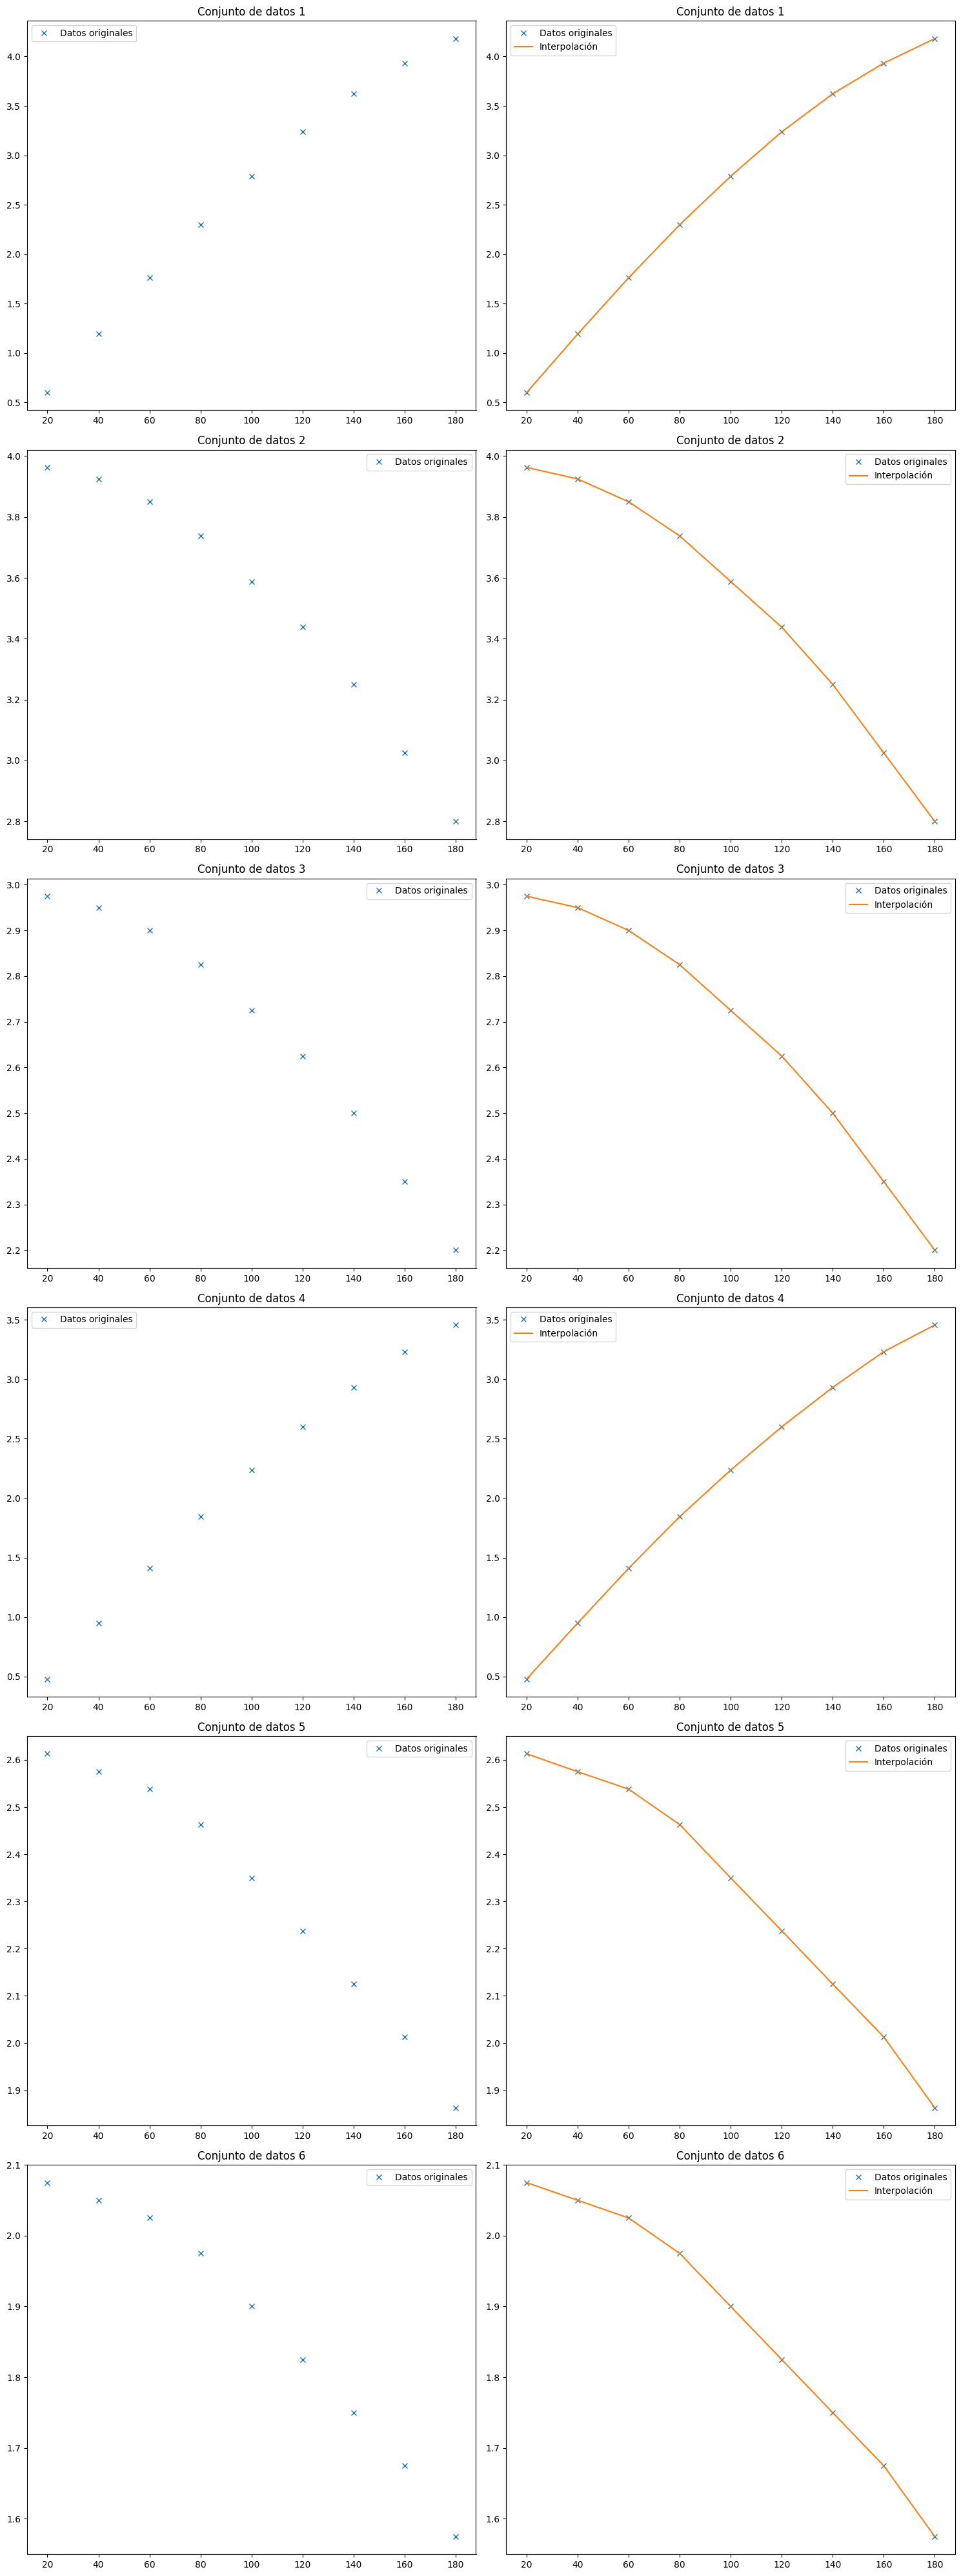

In [8]:
#Figura
fig, axs = plt.subplots(6, 2, figsize=(15, 40))

datos_originales = [y_SL2, y_SL3, y_SL1, y_VL2, y_VL3, y_VL1]
interpolaciones = [ya, yb, yc, yd, ye, yf]

for i in range(6):
    axs[i, 0].plot(x, datos_originales[i], 'x', label='Datos originales')
    axs[i, 0].set_title(f'Conjunto de datos {i+1}')
    axs[i, 0].legend()

for i, interpolacion in enumerate(interpolaciones):
    axs[i, 1].plot(x, datos_originales[i], 'x', label='Datos originales')
    if interpolacion is not None:
        axs[i, 1].plot(x1, interpolacion, '-', label='Interpolación')
    axs[i, 1].set_title(f'Conjunto de datos {i+1}')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

#### Valores en x(30) y x(55)

In [9]:
print(f"El valor interpolado para x(30) = {interSL2:.3f}, y x(55) = {inter_SL2:.3f}")
print(f"El valor interpolado para x(30) = {interSL3:.3f}, y x(55) = {inter_SL3:.3f}")
print(f"El valor interpolado para x(30) = {interSL1:.3f}, y x(55) = {inter_SL1:.3f}")
print(f"El valor interpolado para x(30) = {interVL2:.3f}, y x(55) = {inter_VL2:.3f}")
print(f"El valor interpolado para x(30) = {interVL3:.3f}, y x(55) = {inter_VL3:.3f}")
print(f"El valor interpolado para x(30) = {interVL1:.3f}, y x(55) = {inter_VL1:.3f}")

El valor interpolado para x(30) = 0.897, y x(55) = 1.620
El valor interpolado para x(30) = 3.944, y x(55) = 3.869
El valor interpolado para x(30) = 2.963, y x(55) = 2.913
El valor interpolado para x(30) = 0.715, y x(55) = 1.296
El valor interpolado para x(30) = 2.594, y x(55) = 2.547
El valor interpolado para x(30) = 2.062, y x(55) = 2.031


## Dimensiones

In [10]:
#Calcular dimensiones para 30° con Lagrange
#Rectitud
dx = 20
L2S = dx/pSL2(30)
L3S = pSL3(30) * L2S
L1S = pSL1(30) * L2S
L4S = L3S

#Velocidad
L2V = dx/pVL2(30)
L3V = pVL3(30) * L2V
L1V = pVL1(30) * L2V
L4V = L3V

#Calcular las dimensiones para 55°

#Rectitud
dx = 20
L2S_ = dx/pSL2(55)
L3S_ = pSL3(55) * L2S_
L1S_ = pSL1(55) * L2S_
L4S_ = L3S_

#Velocidad
L2V_ = dx/pVL2(55)
L3V_ = pVL3(55) * L2V_
L1V_ = pVL1(55) * L2V_
L4V_ = L3V_

In [11]:
#Calcular dimensiones para 30° con Numpy
#Rectitud
dx = 20
L2_S = dx/np.interp(30, x,y_SL2)
L3_S = np.interp(30, x,y_SL3) * L2_S
L1_S = np.interp(30, x,y_SL1) * L2_S
L4_S = L3_S

#Velocidad
L2_V = dx/np.interp(30, x, y_VL2)
L3_V = np.interp(30, x, y_VL3) * L2_V
L1_V = np.interp(30, x, y_VL1)* L2_V
L4_V = L3_V

#Calcular las dimensiones para 55°

#Rectitud
L_2S = dx/np.interp(55, x,y_SL2)
L_3S = np.interp(55, x,y_SL3) * L_2S
L_1S = np.interp(55, x,y_SL1) * L_2S
L_4S = L_3S

#Velocidad
L_2V = dx/np.interp(55, x, y_VL2)
L_3V = np.interp(55, x, y_VL3) * L_2V
L_1V = np.interp(55, x, y_VL1) * L_2V
L_4V = L_3V

In [12]:
print("Dimensiones para rectitud y velocidad para 30° con Lagrange ")
print(f"Las dimensiones para 30° de L1 = {L1S}, L2 = {L2S}, L3 = {L3S}, L4 = {L4S}")
print(f"Las dimensiones para 30° de L1 = {L1V}, L2 = {L2V}, L3 = {L3V}, L4 = {L4V}")

print("Dimensiones para rectitud y velocidad para 55° con Lagrange")
print(f"Las dimensiones para 55° de L1 = {L1S_}, L2 = {L2S_}, L3 = {L3S_}, L4 = {L4S_}")
print(f"Las dimensiones para 55° de L1 = {L1V_}, L2 = {L2V_}, L3 = {L3V_}, L4 = {L4V_}")

print("Dimensiones para rectitud y velocidad para 30° con Numpy")
print(f"Las dimensiones para 30° de L1 = {L1_S}, L2 = {L2_S}, L3 = {L3_S}, L4 = {L4_S}")
print(f"Las dimensiones para 30° de L1 = {L1_V}, L2 = {L2_V}, L3 = {L3_V}, L4 = {L4_V}")

print("Dimensiones para rectitud y velocidad para 55° con Numpy")
print(f"Las dimensiones para 55° de L1 = {L_1S}, L2 = {L_2S}, L3 = {L_3S}, L4 = {L_4S}")
print(f"Las dimensiones para 55° de L1 = {L_1V}, L2 = {L_2V}, L3 = {L_3V}, L4 = {L_4V}")

Dimensiones para rectitud y velocidad para 30° con Lagrange 
Las dimensiones para 30° de L1 = 65.85865974829598, L2 = 22.11056130852223, L3 = 87.75099397322296, L4 = 87.75099397322296
Las dimensiones para 30° de L1 = 57.21942641174523, L2 = 27.692087447433437, L3 = 72.00930145847735, L4 = 72.00930145847735
Dimensiones para rectitud y velocidad para 55° con Lagrange
Las dimensiones para 55° de L1 = 35.90859898892062, L2 = 12.32780253947045, L3 = 47.69698364576915, L4 = 47.69698364576915
Las dimensiones para 55° de L1 = 31.34938092875953, L2 = 15.427047245800924, L3 = 39.31439124861217, L4 = 39.31439124861217
Dimensiones para rectitud y velocidad para 30° con Numpy
Las dimensiones para 30° de L1 = 66.05351170568562, L2 = 22.29654403567447, L3 = 87.93756967670011, L4 = 87.93756967670011
Las dimensiones para 30° de L1 = 57.69230769230769, L2 = 27.972027972027973, L3 = 72.55944055944057, L4 = 72.55944055944057
Dimensiones para rectitud y velocidad para 55° con Numpy
Las dimensiones para 55°

## **Conclusiones**
Teniendo en cuenta los resultados que nos arrojan los métodos de Lagrange y Numpy, es posible concluir que el método que mejor se ajusta a los datos es el método de Lagrange, teniendo en cuenta que este refleja mejor las variaciones en los datos y sus tendencias.